In [669]:
import matplotlib.pyplot as plt
import networkx as nx
import sklearn
from sklearn.preprocessing import normalize
from sklearn import preprocessing
import pickle as pickle

import numpy as np

import plotly
import plotly.express as px
import plotly.graph_objs as pgo
import plotly.offline as py
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.io as pio

from tqdm import tqdm

import random

# Import networks

In [843]:
########### IMPORT NETWORKS.  ###########

#pathway-based networks
path = '/Users/Iva/Documents/project/data/disease_networks/'
G_nf = nx.read_gml (path + "G_nf.gml")
G_alps = nx.read_gml (path + "G_alps.gml")
G_hem1 = nx.read_gml (path + 'G_hem1.gml')

## rw networks 1% top
path = '/Users/Iva/Documents/project/data/random_walks_networks/'
G_nf_rw = nx.read_gml (path + "G_nf_rw.gml")
G_alps_rw = nx.read_gml (path +"G_alps_rw.gml")
G_hem1_rw = nx.read_gml (path +"G_hem1_rw.gml")

##literature-based rw networks 5% top
path = '/Users/Iva/Documents/project/data/random_walks/rw_literature/'
G_nf_rw_literature = nx.read_gml(path + "nf_rw_literature.gml")

##literature-based rw networks 2% top
G_alps_rw_literature = nx.read_gml (path + "alps_rw_literature.gml")
path = "/Users/Iva/Documents/project/data/random_walks_networks/G_hem1_all_rw.gml"
G_hem1_rw_literature = nx.read_gml (path)

## monster
path = "/Users/Iva/Documents/project/data/disease_networks/G_monster.gml"
G_monster = nx.read_gml (path)

'''
path = '/Users/Iva/Documents/project/data/VR/nodes and edges/NF/literature_rw/'
G=nx.read_edgelist(path + 'nf_rw_literature_edges.csv',delimiter = ',')
'''

NetworkXError: expected ']', found EOF at (6, 1)

In [849]:
print (len(list((G_monster.neighbors('4763')))))

125


# Functions


In [840]:
def annotateID (network, listofsymbols, dictofnames, dictoffunctions): #annotate ID, gene name, gene function
    list1 = []
    list2 = []
    for i in listofsymbols:
        list1.append (i[1])

    
    for node in network.nodes():
        if node in list1:
            network.nodes[node]["symbol"] = symbol_id[list1.index (node)][0]
        else:
            network.nodes[node]["symbol"] = str (node)
            
    for node in network.nodes():
        if node not in name_data_dict.keys():
            network.nodes[node]["name"] = str(node)
        if node in name_data_dict.keys():
            network.nodes[node]["name"] = name_data_dict[node]
            
    for node in network.nodes():
        if node in list(dictoffunctions.keys()):
            network.nodes[node]['function'] = dictoffunctions[node]
        if node not in list(dictoffunctions.keys()):
            network.nodes[node]['function'] = 'NA'
    return (network)





########## CREATE EDGE LIST.  ##############

def edge_list (G, path, filename): #has problems in VR - use Felixes version
    name = str(filename)+".csv"
    file = open (path+name, "w")
    for i in list(G.edges()):
        if i[0] != i[1]:
            file.write (i[0] + "," + i[1] + "\n")
        if i[0] == i[1]:
            continue
    file.close()
    return (file)



def node_list(G, filename):
    l = len(list(G.nodes()))
    name = str(filename) + ".csv"
    file = open(name, "w")
    n = 0
    for i in list(G.nodes()):
        if n < (l-1):
            file.write (i + "," + str(G.nodes()[i]["symbol"]) + "," + str(G.nodes()[i]["name"])+','+ str(G.nodes()[i]["function"]) +',' + namespace + "\n")
        if n == (l-1):
            file.write (i + "," + str(G.nodes()[i]["symbol"]) + "," + str(G.nodes()[i]["name"])+','+ str(G.nodes()[i]["function"]) +',' + namespace)
        n += 1
    file.close()
    return (file)



### CHRIS

# normalize coordinates 

def get_3D(dictionary, G):
    x_list3D = []
    y_list3D = []
    z_list3D = []
    for k,v in dictionary.items():
        x_list3D.append(v[0])
        y_list3D.append(v[1])
        z_list3D.append(v[2])

    xx_norm3D = sklearn.preprocessing.minmax_scale(x_list3D, feature_range=(0, 1), axis=0, copy=True)
    yy_norm3D = sklearn.preprocessing.minmax_scale(y_list3D, feature_range=(0, 1), axis=0, copy=True)
    zz_norm3D = sklearn.preprocessing.minmax_scale(z_list3D, feature_range=(0, 1), axis=0, copy=True)

    xx_norm3D_final=[]
    for i in xx_norm3D:
        xx_norm3D_final.append(round(i,10))

    yy_norm3D_final=[]
    for i in yy_norm3D:
        yy_norm3D_final.append(round(i,10))

    zz_norm3D_final=[]
    for i in zz_norm3D:
        zz_norm3D_final.append(round(i,10)) 

    return(dict(zip(list(G.nodes()), zip(xx_norm3D_final,yy_norm3D_final,zz_norm3D_final))))




def layout_file(G, filename, position, color, layout, literature):
    #default for a is 1
    name = str(filename) + ".csv"
    file = open(name, "w")
    a = 128
    
    for i in list(G.nodes()):
        '''
        if i in literature:
            a = 200
        else:
            a = 1'''
            
        pos = position[i]
        file.write (str(i)+","+str(pos[0])+","+str(pos[1])+","+str(pos[2])+","+str(color[0])+","+str(color[1])+","+str(color[2])+"," +str(a)+","+layout+"\n")
    file.close()
    return (file)




def selection_file(dictionary, filename):
    file = open(filename, 'w')
    l = 0
    for i, j  in dictionary.items():
        l+=len(j)
    print (l)
    n = 0
    for i, j in dictionary.items():

        for node in j:
            
            if n != (l-1):
                file.write(node+','+i+','+ 'SELECTION'+','+i+','+'none'+'\n')
            if n == (l-1):
                print ('da')
                file.write(node+','+i+','+ 'SELECTION'+','+i+','+'none')
            n += 1
        
    file.close()
    return (file)

#########################################################################
#
#                  P H E N O T Y P E    
# 
#########################################################################
#
#         P H E N O T Y P E    O N T O L O G Y
#
#          GENERATES GENE ONTOLOGY TREE GRAPH
#
#########################################################################
def get_ppi(lcc):
    
    # Open database connection
    db = pymysql.connect("a743-puppet.msp.univie.ac.at","menchegroup20","aIcelipT","GenesGO")
    # prepare a cursor object using cursor() method
    cursor = db.cursor()

    sql = """
            SELECT
            e.entrez_1,
            e.entrez_2,
            g1.Locus_Type,
            g1.Locus_Group,
            g2.Locus_Type,
            g2.Locus_Group
            FROM networks.PPI_hippie2017 e
            INNER JOIN GenesGO.hgnc_complete g1 ON e.entrez_1 = g1.Entrez_Gene_ID_NCBI
            INNER JOIN GenesGO.hgnc_complete g2 ON e.entrez_2 = g2.Entrez_Gene_ID_NCBI
            WHERE 
                (e.author != '' AND e.entrez_1 != e.entrez_2
                    AND g1.Locus_Type = 'T cell receptor gene' AND g2.Locus_Type = 'T cell receptor gene')	          # 0 links    
                OR (e.author != '' AND e.entrez_1 != e.entrez_2
                    AND g1.Locus_Type = 'immunoglobulin gene' AND g2.Locus_Type = 'immunoglobulin gene')              # 4 links    
                OR (e.author != '' AND e.entrez_1 != e.entrez_2
                    AND g1.Locus_Type = 'immunoglobulin gene' AND g2.Locus_Type = 'T cell receptor gene')             # 0 links
                OR (e.author != '' AND e.entrez_1 != e.entrez_2
                    AND g1.Locus_Type = 'T cell receptor gene' AND g2.Locus_Type = 'immunoglobulin gene') 	          # 0 links         
                OR (e.author != '' AND e.entrez_1 != e.entrez_2
                    AND g1.Locus_Type = 'T cell receptor gene' AND g2.Locus_Type = 'gene with protein product')       # 17 links         
                OR (e.author != '' AND e.entrez_1 != e.entrez_2
                    AND g1.Locus_Type = 'gene with protein product' AND g2.Locus_Type = 'T cell receptor gene')       # 1 links         
                OR (e.author != '' AND e.entrez_1 != e.entrez_2
                    AND g1.Locus_Type = 'immunoglobulin gene' AND g2.Locus_Type = 'gene with protein product')        # 115 links         
                OR (e.author != '' AND e.entrez_1 != e.entrez_2
                    AND g1.Locus_Type = 'gene with protein product' AND g2.Locus_Type = 'immunoglobulin gene')        # 295 links    
                OR (e.author != '' AND e.entrez_1 != e.entrez_2
                    AND g1.Locus_Type = 'gene with protein product' AND g2.Locus_Type = 'gene with protein product')  # 309602 links  

        
        """
    try: 
        # execute SQL query 
        cursor.execute(sql)
        data = cursor.fetchall()

    except:
        print('SQL error')

    db.close()    
    
    l_nodes = []
    for x in data:
        l_nodes.append(x[0])
        l_nodes.append(x[1])
    l_nodes = list(set(l_nodes))

    G = nx.Graph()
    G.add_nodes_from(l_nodes)
    
    for x in data:
        G.add_edge(x[0],x[1])
    
    if lcc == 1:
        Nl_l = sorted(nx.connected_components(G)) # generates list of components node lists
        l = [len(x) for x in Nl_l] # returns list of length of node lists 
        idx = l.index(max(l))   # find the index of the maximal length i.e. lcc
        Nlcc = Nl_l[idx]    # pin down lcc
        G_lcc = G.subgraph(Nlcc)   # extract lcc graph
        G = G_lcc.copy()
    else:
        pass
    
    return G






def HPO_tree(graphtype,stream = 'up'):
     
    
    db = pymysql.connect("lem.westeurope.cloudapp.azure.com","readonly","ra4Roh7ohdee","HumanPhenotypes")
    
    
    cursor = db.cursor()
    # Query to contruct GO Hierarchy
    #
    #          Returns complete list of GO IDs that have a 'is a' relation 
    #
    sql_tree =  """
                SELECT
                    hp_id,
                    hp_name,
                    is_a
                FROM HumanPhenotypes.phenotype_tree
                WHERE is_obsolete NOT LIKE 'true'
                """ 
    
    cursor.execute(sql_tree)
    data_tree = cursor.fetchall()

#     try: 
#         # execute SQL query using execute() method.
#         cursor.execute(sql_tree)
#         data_tree = cursor.fetchall()
#     except:
#         print('GO tree SQL error')

    db.close()
    if graphtype == 'directed':
        G = nx.DiGraph()
    else:
        G = nx.Graph()
        
    d_HPOterms_name = {}
    c = 0
    for x in data_tree:
        c +=1
        G.add_node(x[0])
        d_HPOterms_name[x[0]] = x[1]
 
    tip = 'HP:0000001'
#     G.add_node(tip)

    if stream == 'up':
        
        # 1st condition to make a link
        # Node A get a directed link to B whenever there is B in the list of the 'is_a' column
        for x in data_tree:
            hp_id = x[0]
            is_a = x[2]
            l_connectors = is_a.split(',HP')
            if hp_id != tip:
                for cons in l_connectors:
                    target = 'HP:' + cons.split(':')[1].split('!')[0][:-1]
                    G.add_edge(hp_id,target)
    
    else:
        # down   
        # 1st condition to make a link
        # Node A get a directed link to B whenever there is B in the list of the 'is_a' column
        for x in data_tree:
            hp_id = x[0]
            is_a = x[2]
            l_connectors = is_a.split(',HP')
            if hp_id != tip:
                for cons in l_connectors:
                    target = 'HP:' + cons.split(':')[1].split('!')[0][:-1]
                    G.add_edge(target,hp_id)

    return G, tip, d_HPOterms_name


#########################################################################
#
#               G E N E  2  HPO
#
#          GENERATES DICT FOR GENE TO HPO ASSOCIATIONS
#
#########################################################################    
def gene2hp():
    
    db = pymysql.connect("lem.westeurope.cloudapp.azure.com","readonly","ra4Roh7ohdee","HumanPhenotypes")    
    

    # prepare a cursor object using cursor() method
    cursor = db.cursor()

    sql = """ 
        SELECT DISTINCT
            gene_id_entrez,
            HPO_ID
        FROM disease_gene_phenotype_all
          """ 
    try: 
        # execute SQL query using execute() method.
        cursor.execute(sql)
        data = cursor.fetchall()
    except:
        print('SQL error')
    db.close()

#     t0 = time.time()
    d_gene_hp = defaultdict(list)
    d_hp_gene = defaultdict(list)


    for x in data:
        gene = str(x[0])
        hp = x[1]
        d_gene_hp[gene].append(hp)
        d_hp_gene[hp].append(gene)
        
    return d_gene_hp, d_hp_gene

#########################################################################
#
#          COLLECT ALL UPSTREAM TERMS FROM ONTOLGY AND
#          GENERATES DICT FOR GENE TO HPO+UPSTREAM TERMS 
#
######################################################################### 
def hpo_upstream_relations(ppionly = 1):
    
    G_up, tip, d_HPOterms_name = HPO_tree('directed',stream = 'up')

    d_gene_hp, d_hp_gene = gene2hp()

    if ppionly == 1:
        #global G_ppi
        G_ppi = get_ppi(1)
        # upstream gene 2 branch association
        d_gene_hpup = {}
        c = 0
        for gene, hps in d_gene_hp.items():
            if gene in G_ppi:
                all_set = set()
                for hp in hps:
                    branch = nx.descendants(G_up,hp)
                    branch.add(hp)
                    all_set = all_set.union(branch)
                d_gene_hpup[gene] = all_set
            
        # turn dictionary
        d_uphp_genes = defaultdict(list)
        for gene, hps in d_gene_hpup.items():
            for hp in hps:
                d_uphp_genes[hp].append(gene)
        
        d_uphp_setgenes = {}
        for hp, genes in d_uphp_genes.items():
            d_uphp_setgenes[hp] = set(genes)

    else:
        # upstream gene 2 branch association
        d_gene_hpup = {}
        c = 0
        for gene, hps in d_gene_hp.items():
            all_set = set()
            for hp in hps:
                branch = nx.descendants(G_up,hp)
                branch.add(hp)
                all_set = all_set.union(branch)
            d_gene_hpup[gene] = all_set
            
        # turn dictionary
        d_uphp_genes = defaultdict(list)
        for gene, hps in d_gene_hpup.items():
            for hp in hps:
                d_uphp_genes[hp].append(gene)
        
        d_uphp_setgenes = {}
        for hp, genes in d_uphp_genes.items():
            d_uphp_setgenes[hp] = set(genes)
            
    return d_gene_hpup, d_uphp_setgenes

#########################################################################
#########################################################################

# GO ontology and Disease ontology (DI)

In [185]:
## IMPORT GO ANNOTATIONS

annotation = open ("/Users/Iva/Documents/project/data/Machine_learning/ontology/goa_human.gaf.txt")
annotation_data = []
n=0

for i in annotation:
    if "!" not in i:
        a = i.split()
        annotation_data.append(a)
annotation_data_clean = []
annotation_data_clean.append(["DB Object ID", "DB Object Symbol", "GO ID", "DB:Reference"])

for i in annotation_data:
    a = [i[1], i[2], i[3], i[4]]
    annotation_data_clean.append(a)
    

    
ontology = open ("/Users/Iva/Documents/project/data/Machine_learning/ontology/go_ontology_core.obo.txt")
ontology_data = []
positions = []

n = 0
for i in ontology:
    if "[Term]" in i:
        positions.append(n)
    n += 1
    a = i.split("\n")
    ontology_data.append(a)   
ontology_data_clean = []
        
for i in range(len(positions)):
    l = []
    if i == 47209:
        break
    for k in range(positions[i], positions[i+1]):
        l.extend(ontology_data[k])
    l = [x for x in l if x != '']
    l.remove('[Term]')
    ontology_data_clean.append(l)

go_ontology = {}  #dictionary with GOID: name & def

for i in ontology_data_clean:
    a = i[3].replace('def: "', ' ')
    a = a[:a.find('"')-1]
    go_ontology[i[0].replace('id: ', '')] = i[1].replace('name: ', '') #+ ' &alt_id' + a
    

path = '/Users/Iva/Documents/project/data/VR/Felix_data/'
d_do_genes = pickle.load( open(path + "d_genes_gobio.pkl", "rb" ) )
gene_function = {}

for i in G_nf_rw_literature.nodes():
    if i in list(d_do_genes.keys()):
        if d_do_genes[i][0] in list(go_ontology.keys()):
            gene_function[i]=go_ontology[d_do_genes[i][0]]



In [826]:
edge_list(G_hem1_rw_literature, 'hem1_edges.csv')

<_io.TextIOWrapper name='hem1_edges.csv.txt' mode='w' encoding='UTF-8'>

# Generate edges from layout file
    

In [829]:
from itertools import combinations
path = '/Users/Iva/Documents/project/data/VR/nodes and edges/figures_hem1/'
f = open(path + 'iva_hem1_layout.csv','r')
lines = f.readlines()
l_entz = []
for line in lines:
    entz = line.strip().split(',')[0]   
    l_entz.append(entz)
f.close()

f = open(path + 'hem1_rw_literature_edges.csv','r')
lines = f.readlines()
l_ent_ab = []
for line in tqdm(lines):
    entza = line.strip().split(',')[0]   
    entzb = line.strip().split(',')[1]   

    l_ent_ab.append([entza,entzb])
f.close()

print(len(set(l_entz)))

G = nx.Graph()
G.add_nodes_from(l_entz)

# for 
cc = 0
for a, b in tqdm(combinations(l_entz,2)):
    if [a,b] in l_ent_ab:
        G.add_edge(a,b)
    elif [b,a] in l_ent_ab:
        G.add_edge(a,b)
    else:
        pass

    cc += 1
    
    
print(cc)


100%|██████████| 32320/32320 [00:00<00:00, 387580.89it/s]
13it [00:00, 121.45it/s]

941


442270it [1:16:32, 96.30it/s] 


442270


In [830]:
print (len(G.edges()))
nx.write_edgelist(G,path+'hem1_edgelist_new.csv',delimiter=',', data=False)

32320


# Pipeline for preparing network for VR

In [ ]:
namespace = 'iva_nf'

In [833]:
## ANNOTATE GENE SYMBOLS TO NODES (ENTREZ ID)

path = "/Users/Iva/Documents/project/data/symbols2entrezIDs.txt"
data = open (path)
data = list (data)
symbol_id = []

for i in data:
    symbol_id.append (i.split ("\t")[:3])
    
symbol_id = symbol_id [1:]

name = open('/Users/Iva/Documents/project/data/VR/gene_names/entrez_to_name.tsv')
name_data = []

for i in name:
    a = i.split('\t')
    a = [a[0], a[1].replace('\n', '')]
    name_data.append(a)
name_data = name_data[1:]

name_data_dict = {}
for i in name_data:
    name_data_dict[i[0]] = i[1]
    

'''
G_nf = annotateID(G_nf, symbol_id)
G_alps = annotateID(G_alps, symbol_id)
G_hem1 = annotateID(G_hem1, symbol_id)


G_nf_rw = annotateID(G_nf_rw, symbol_id, name_data_dict)
G_alps_rw = annotateID(G_alps_rw, symbol_id, name_data_dict)
G_hem1_rw = annotateID(G_hem1_rw, symbol_id, name_data_dict)

G_nf_rw_literature = annotateID(G_nf_rw_literature, symbol_id, name_data_dict)
G_alps_rw_literature = annotateID(G_alps_rw_literature, symbol_id, name_data_dict)
G_hem1_rw_literature = annotateID(G_hem1_rw_literature, symbol_id, name_data_dict)
'''

#G_nf_rw_literature = annotateID(G_nf_rw_literature, symbol_id, name_data_dict, gene_function)
G_hem1_rw_literature = annotateID(G_hem1_rw_literature, symbol_id, name_data_dict, gene_function)

In [834]:
#CREATE NODE AND EDGELIST

'''
edge_list(G_nf, "nf_edges")
edge_list(G_alps, "alps_edges")
edge_list(G_hem1, "hem1_edges")

edge_list(G_nf_rw, "nf_rw_edges")
edge_list(G_alps_rw, "alps_rw_edges")
edge_list(G_hem1_rw, "hem1_rw_edges")

edge_list (G_nf_rw_literature, "nf_rw_literature_edges")
edge_list (G_alps_rw_literature, "alps_rw_literature_edges")
edge_list (G_hem1_rw_literature, "hem1_rw_literature_edges")


'''

edge_list (G_nf_rw_literature, "nf_rw_literature_edges")

########## CREATE NODELIST. #################


'''
node_list( G_nf, "G_nf_nodes", nf_lit)
node_list( G_alps, "G_alps_nodes", alps_lit)
node_list( G_hem1, "G_hem1_nodes", hem1_lit)

node_list( G_nf_rw, "nf_rw_nodes", nf_lit)
node_list( G_alps_rw, "alps_rw_nodes", alps_lit)
node_list( G_hem1_rw, "hem1_rw_nodes", hem1_lit)

node_list( G_nf_rw_literature, "nf_rw_literature_nodes", nf_lit)
node_list( G_alps_rw_literature, "alps_rw_literature_nodes", alps_lit)
node_list( G_hem1_rw_literature, "hem1_rw_literature_nodes", hem1_lit)


'''
'''

nf_rw_layout = nx.spring_layout (G_nf_rw, dim = 3)
alps_rw_layout = nx.spring_layout (G_alps_rw, dim=3)
hem1_rw_layout = nx.spring_layout (G_hem1_rw, dim=3)

nf_rw_literature_layout = nx.spring_layout (G_nf_rw_literature, dim = 3)
alps_rw_literature_layout = nx.spring_layout (G_alps_rw_literature, dim=3)
hem1_rw_literature_layout = nx.spring_layout (G_hem1_rw_literature, dim=3)

#must normalize to positive values for VR
nf_rw_layout_norm = get_3D (nf_rw_layout, G_nf_rw)
alps_rw_layout_norm = get_3D (alps_rw_layout, G_alps_rw)
hem1_rw_layout_norm = get_3D (hem1_rw_layout, G_hem1_rw)

nf_rw_literature_layout_norm = get_3D (nf_rw_literature_layout, G_nf_rw_literature)
alps_rw_literature_layout_norm = get_3D (alps_rw_literature_layout, G_alps_rw_literature)
hem1_rw_literature_layout_norm = get_3D (hem1_rw_literature_layout, G_hem1_rw_literature)


'''

#node_list( G_nf_rw_literature, "nf_rw_literature_nodes")
namespace = 'iva_hem1_1'
node_list( G_hem1_rw_literature, "hem1_rw_literature_nodes")



<_io.TextIOWrapper name='hem1_rw_literature_nodes.csv' mode='w' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/Iva/Documents/project/data/VR/nodes and edges/Video_nf_small/nf_edge_list_small.csv' mode='w' encoding='UTF-8'>

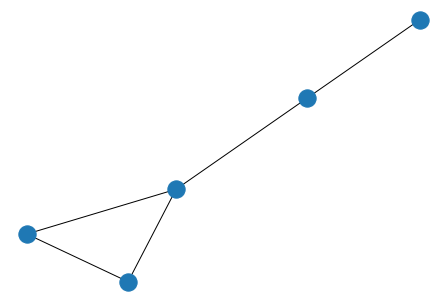

In [842]:
 #SMALL (only pathway genes) & BIG NETWORK (neighbors of neighbors) FOR NF VIDEO
    
#lets start with small
G = G_monster.subgraph(['5595', '673', '4893' , '5604', '4763']) #'3845'KRAS, '3265', HRAS
pos = nx.spring_layout(G)
nx.draw (G, pos=pos)
path='/Users/Iva/Documents/project/data/VR/nodes and edges/Video_nf/'
file = open(path+ 'iva_nf_sphere_layout_2.csv', 'r')
file_nodes = open(path+'nf_rw_literature_nodes.csv', 'r')

path='/Users/Iva/Documents/project/data/VR/nodes and edges/Video_nf_small/'
new_file=open(path+'iva_nf_sphere_layout_small.csv', 'w')
new_nodes=open(path+'nf_rw_nodes_small.csv', 'w')


for i in file:
    if i.split(',')[0] in list(G.nodes()):
        new_file.write(i)
for i in file_nodes:
    if i.split(',')[0] in list(G.nodes()):
        new_nodes.write(i)
    
file.close()
file_nodes.close()
new_file.close()
new_nodes.close()

edge_list(G, path, 'nf_edge_list_small')




In [ ]:
#### list of proteins in literature 

nf_lit = ['4763', '3845',  '4893', '3265', '22882', '5609', '5594', '161742', '5291', '207', '2475']
nf_lit = ['4763', '3845',  '4893', '3265', '22882', '5609', '5594', '161742', '5291', '207', '2475']
alps_lit = ['355', '356', '841', '836', '839', '840']
hem1_lit = ['3071','60','10006','8936','10787','23191','26999','55845','253260','2475','79109','64223','55615','79899','207']


In [524]:
#############################
# DISEASE ONTOLOGY ANNOTATION
#############################

#for neurofibromatosis
#learning_disabilities=[i for i in list(G_nf_rw_literature.nodes()) if i in d_do_genes['DOID:8927']]  #DOID:8927

cancer=[i for i in list(G_nf_rw_literature.nodes()) if i in d_do_genes['DOID:14566']]  #disease of cellular proliferation
skin_disease =[i for i in list(G_nf_rw_literature.nodes()) if i in d_do_genes['DOID:37']]  #DOID:37
mental_health=[i for i in list(G_nf_rw_literature.nodes()) if i in d_do_genes['DOID:150']]
nervous_system=[i for i in list(G_nf_rw_literature.nodes()) if i in d_do_genes['DOID:863']]
disease=[i for i in list(G_nf_rw_literature.nodes()) if i in d_do_genes['DOID:4']]

#genes specific for only one disease ontology

path = '/Users/Iva/Documents/project/data/VR/Felix_data/'
d_do_genes = pickle.load( open(path + "d_do_genes.pkl", "rb" ) )

nf_disease = {} # nodes and corresponding phenotypes of interest
nodes = list(G_nf_rw_literature.nodes())

for i in nodes:
    lista = []
    if i in mental_health:
        lista.append('mental_health')
    if i in cancer :
        lista.append('cancer')
    if i in skin_disease:
        lista.append('skin_disease')
    if i in nervous_system :
        lista.append('nervous_system')
    if i not in ((cancer+skin_disease+mental_health+nervous_system)):
        lista.append('rest')
    nf_disease[i] = lista


#if gene has two annotations and of them is cancer , we take the other
#f.e. skin, cancer will be considered a skin disease
#matter of equal groups

cancer_spec = [i for i in cancer if len(nf_disease[i])==1]
skin_spec = [i for i in skin_disease if (len(nf_disease[i])==1 or (len(nf_disease[i])==2 and 'cancer' in nf_disease[i]))]
mental_spec = [i for i in mental_health if len(nf_disease[i])==1 or (len(nf_disease[i])==2 and 'cancer' in nf_disease[i])]
nervous_spec = [i for i in nervous_system if  len(nf_disease[i])==1 or (len(nf_disease[i])==2 and 'cancer' in nf_disease[i])]
disease_spec=[i for i in disease if len(nf_disease[i])==1 or (len(nf_disease[i])==2 and 'cancer' in nf_disease[i])]


b = list(set(cancer+nervous_system+mental_health+skin_disease))

rest = disease
for i in b:
    if i in rest:
        rest.remove(i)
        
cancer = cancer_spec
skin_disease=skin_spec
mental_health = mental_spec
nervous_system = nervous_spec



51744 [-2.99077106  1.67295218 -2.76318765] [ 0.71743288 13.08563037 -2.76318765] green 0
26058 [-2.08086348  0.25964046  1.56172967] [-11.78906741  -6.79378257   1.56172967] green 2
23424 [ 4.91998434 -1.76400983 -0.85446233] [-4.78821959 -8.81743286 -0.85446233] green 2
84909 [ 3.20866728 -2.68492293 -0.86217743] [ 6.91687121  8.72775526 -0.86217743] green 0
10542 [-2.76810455 -0.77513236  1.21208835] [ 9.23189545 -0.77513236  1.21208835] green 4
1457 [-0.16106987 -0.14036669  0.81187749] [11.83893013 -0.14036669  0.81187749] green 4
10522 [3.32524705 0.16022906 1.54567778] [-6.38295688  7.21365208  1.54567778] green 1
6548 [ 0.13180929 -1.10813367 -1.73024893] [-9.57639464 -8.1615567  -1.73024893] green 2
369 [ 0.05319145  0.7153576  -0.8862775 ] [12.05319145  0.7153576  -0.8862775 ] green 4
90 [ 3.6505909   0.66686487 -0.72351605] [-6.05761304 -6.38655816 -0.72351605] green 2
63892 [-1.65793097  0.24587202  3.82113385] [ 2.05027296 11.65855022  3.82113385] green 0
3055 [-0.79548401

3336 [ 2.26882482 -1.00688064  0.5256995 ] [ 5.97702875 10.40579755  0.5256995 ] green 0
1739 [-1.60973465  0.33005545 -0.99098718] [-11.31793859   7.38347847  -0.99098718] green 1
1901 [ 0.41764572  2.23896766 -3.37729836] [-9.29055821  9.29239068 -3.37729836] green 1
25 [-0.39150026  0.13814291 -0.71470827] [11.60849974  0.13814291 -0.71470827] green 4
5689 [ 1.21792185 -1.69680953  1.54097748] [-8.49028208 -8.75023256  1.54097748] green 2
4088 [0.49451917 0.28925404 0.26383606] [12.49451917  0.28925404  0.26383606] green 4
27091 [-3.73753643 -1.84128761 -5.21448612] [-13.44574036   5.21213541  -5.21448612] green 1
23396 [-1.75908518  2.38951659 -2.75534558] [ 1.94911875 13.80219479 -2.75534558] green 0
4691 [-0.01751454 -1.05061567  0.76796401] [ 3.6906894  10.36206253  0.76796401] green 0
2787 [-0.21199006  3.10847187 -1.73551583] [11.78800994  3.10847187 -1.73551583] green 4
10018 [ 0.89895546  2.45065665 -1.15667236] [ 4.6071594  13.86333485 -1.15667236] green 0
3164 [ 1.55386686

185 [-0.77020311  2.6814363  -1.15116036] [-10.47840705  -4.37198673  -1.15116036] green 2
1654 [-0.3221941  -1.14969313  0.63667548] [-10.03039803   5.9037299    0.63667548] green 1
3191 [-0.24419424 -0.47428769  0.15901992] [11.75580576 -0.47428769  0.15901992] green 4
5921 [ 0.48558578  0.36217767 -1.79112017] [12.48558578  0.36217767 -1.79112017] green 4
5825 [ 1.67925751 -2.49842644  1.02838016] [13.67925751 -2.49842644  1.02838016] green 4
2324 [-0.72214532  1.88608861 -1.99216592] [ 2.98605861 -9.52658959 -1.99216592] green 3
2597 [ 0.26582092 -0.69369572  0.21517487] [-9.44238301  6.3597273   0.21517487] green 1
930 [-1.22515917  1.41379344 -3.53679466] [-10.9333631   -5.63962958  -3.53679466] green 2
83987 [-0.43803954 -0.62769461  0.72129226] [ 3.27016439 10.78498359  0.72129226] green 0
53373 [-4.32584    -4.32188559 -1.29397821] [-0.61763606  7.09079261 -1.29397821] green 0
6188 [ 0.21117912 -0.74707401  1.02842462] [12.21117912 -0.74707401  1.02842462] green 4
6139 [ 0.280

695 [-0.11185503  0.93232286 -1.76803541] [ 3.5963489  12.34500106 -1.76803541] green 0
2066 [ 0.04036185  1.09326947 -1.5077548 ] [ 3.74856578 12.50594766 -1.5077548 ] green 0
3064 [0.31098104 0.63924229 0.26038858] [ 4.01918497 12.05192049  0.26038858] green 0
2033 [ 0.98987913 -0.45287159  0.16278136] [ 4.69808306 10.9598066   0.16278136] green 0
2935 [ 0.63863271 -2.71734142  0.67384714] [4.34683665 8.69533677 0.67384714] green 0
6453 [-1.73286474  1.22623348 -1.24857616] [ 1.97533919 12.63891168 -1.24857616] green 0
23411 [1.10706389 0.09737828 0.65996385] [ 4.81526782 11.51005647  0.65996385] green 0
7132 [-0.74596977 -0.02758279 -0.11750177] [ 2.96223416 11.3850954  -0.11750177] green 0
2932 [0.79204881 0.15887749 0.67097396] [ 4.50025274 11.57155569  0.67097396] green 0
23390 [ 0.91094273 -1.93621242 -1.59162271] [ 4.61914667  9.47646578 -1.59162271] green 0
367 [ 0.7153163   0.19752097 -0.49035954] [ 4.42352023 11.61019917 -0.49035954] green 0
8867 [-2.79156137  1.21467662 -2.

6161 [ 0.27718943 -1.95491993  2.22360802] [3.98539337 9.45775826 2.22360802] green 0
6124 [ 0.17781635 -0.94702399  1.44501209] [ 3.88602028 10.46565421  1.44501209] green 0
4288 [ 0.3344042  -1.1028223   0.86020172] [ 4.04260813 10.30985589  0.86020172] green 0
23524 [-0.75246727 -1.09233975  1.03409123] [ 2.95573666 10.32033844  1.03409123] green 0
55832 [ 0.52048618 -1.29929721  1.38912046] [ 4.22869011 10.11338098  1.38912046] green 0
5903 [0.14107808 0.00689646 1.81333649] [ 3.84928202 11.41957466  1.81333649] green 0
9967 [-0.14586104 -0.61813939  2.30034351] [ 3.56234289 10.79453881  2.30034351] green 0
26227 [ 0.11276323 -1.95785284  0.56493413] [3.82096716 9.45482536 0.56493413] green 0
51493 [ 0.68484658 -2.26841187  1.8075887 ] [4.39305051 9.14426632 1.8075887 ] green 0
7706 [ 0.06798139 -0.41912979  0.56697565] [ 3.77618532 10.99354841  0.56697565] green 0
5430 [ 0.69867778 -0.09444311  1.38926601] [ 4.40688171 11.31823508  1.38926601] green 0
85451 [ 1.05298567 -1.0492157

284427 [ 0.96342814  2.14962149 -2.29798508] [ 4.67163207 13.56229968 -2.29798508] green 0
5354 [ 1.86358285 -2.28043294 -3.34175777] [ 5.57178678  9.13224526 -3.34175777] green 0
51440 [-7.18523645  0.78046435 -4.67526388] [-3.47703252 12.19314255 -4.67526388] green 0
257068 [-2.92024636  3.23191142 -3.24530292] [ 0.78795757 14.64458962 -3.24530292] green 0
120939 [ 0.11071251 -0.23189531 -4.52069139] [ 3.81891645 11.18078288 -4.52069139] green 0
5920 [ 0.56971556 -2.05357027 -3.36890411] [ 4.27791949  9.35910793 -3.36890411] green 0
2784 [-1.72575998  2.29495716 -1.49950755] [ 1.98244395 13.70763536 -1.49950755] green 0
229 [ 3.70255256 -0.6474191  -1.64217997] [ 7.41075649 10.7652591  -1.64217997] green 0
353345 [ 6.03837824 -4.25168371 -6.77401781] [ 9.74658217  7.16099448 -6.77401781] green 0
5098 [ 0.56290644  0.50145084 -4.03120518] [ 4.27111038 11.91412903 -4.03120518] green 0
2781 [ 1.23265207  1.26764286 -2.31532502] [ 4.940856   12.68032105 -2.31532502] green 0
55922 [ 1.627

8858 [1.79272521 5.70015287 4.12906551] [ 5.50092914 17.11283107  4.12906551] green 0
51085 [-2.91710615 -3.5737803   1.63092709] [0.79109778 7.8388979  1.63092709] green 0
115727 [ 3.87270665  4.99811506 -4.60211754] [ 7.58091058 16.41079326 -4.60211754] green 0
2667 [-5.20488882 -1.89111733  3.24283576] [-1.49668489  9.52156086  3.24283576] green 0
5922 [ 2.73716402  1.52711415 -4.16472197] [ 6.44536795 12.93979235 -4.16472197] green 0
126868 [-5.27069092  2.82635546  1.92698193] [-1.56248699 14.23903365  1.92698193] green 0
414899 [ 3.77785301 -0.16312671 -3.71153784] [ 7.48605694 11.24955149 -3.71153784] green 0
1718 [ 2.84129548 -0.59524232 -3.6194334 ] [ 6.54949941 10.81743587 -3.6194334 ] green 0
11145 [ 5.19296026  4.84190702 -2.85829687] [ 8.90116419 16.25458522 -2.85829687] green 0
4887 [-1.9853797   3.81952429  2.00937343] [ 1.72282424 15.23220248  2.00937343] green 0
9175 [ 4.3801012   4.11718416 -0.62064189] [ 8.08830514 15.52986236 -0.62064189] green 0
4338 [ 6.77617741 -

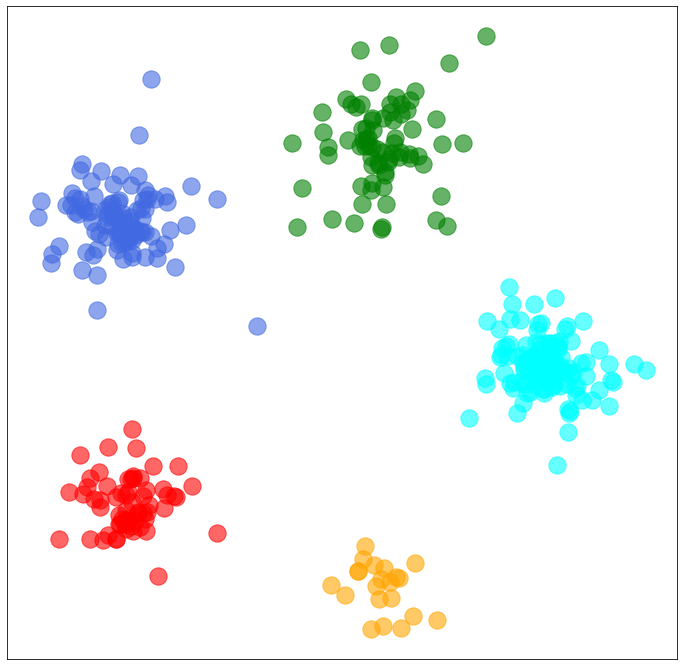

In [773]:
############################################
### SPRING LAYOUT GROUPED BY DISEASES ######
############################################

import string, random
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import random as sparse_random


# Random string generator
def rand_string(size=6, chars=string.ascii_uppercase):
    return ''.join(random.choice(chars) for _ in range(size))


# Set up a nodes and networks randomly
nodes = list(set(cancer+nervous_system+mental_health+skin_disease+rest))
networks = ['ld', 'neuro', 'n_cancer', 'skin', 'rest']
networks_list = networks*4
#random.shuffle(networks_list)

# Define what nodes belong to what network and what their color should be
node_network_map = dict(zip(nodes, networks_list))
colors = ['green', 'royalblue', 'red', 'orange', 'cyan']
color_map = dict(zip(networks, colors))

graph = nx.Graph()
graph.add_nodes_from(nodes)
graph.add_edges_from (list(G_nf_rw_literature.edges()))


nodes_by_color={}
nodes_by_color['cyan']=cancer
nodes_by_color['royalblue'] = mental_health
nodes_by_color['red'] = nervous_system
nodes_by_color['orange'] = skin_disease
nodes_by_color['green'] = rest



# import numpy as np

pos = nx.spring_layout(graph, dim=3, scale=9)   
s_phi = np.linspace(0, 2*np.pi, 1+len(colors))
s_theta = np.linspace(-np.pi, np.pi, 1+len(colors))
repos = []
rad = 12#3.5     # radius of circle
for phi in s_phi:
    if phi > 0:
        #print(rad*np.cos(ea), rad*np.sin(ea))  # location of each cluster
        repos.append(np.array([rad*np.cos(phi), rad*np.sin(phi), 0])) #rad*np.sin(ea)]))
for ea in pos.keys():
    #color = 'black'
    posx = 0
    if ea in nodes_by_color['green']:
        #color = 'green'
        posx = 0

    elif ea in nodes_by_color['royalblue']:
        #color = 'royalblue'
        posx = 1
    elif ea in nodes_by_color['red']:
        #color = 'red'
        posx = 2
    elif ea in nodes_by_color['orange']:
        #color = 'orange'
        posx = 3
    
    elif ea in nodes_by_color['cyan']:
        #color = 'cyan'
        posx = 4
    else:
        pass
    
    print(ea, pos[ea], pos[ea]+repos[posx], color, posx)
    pos[ea] += repos[posx]

edges = graph.edges()

# First draw the nodes 
plt.figure(figsize=(12,12))
for color, node_names in nodes_by_color.items():
    print (color)
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=node_names, node_color=color, size=1, font_size = 0.001, alpha = 0.6)
    
other_nodes = [] #nodes that are not in any ontology

for i in list(G_nf_rw_literature.nodes()):
    if i not in nodes:
        other_nodes.append(i)

plt.show()



In [803]:
print (weird)

{'79109': (0.6180339887, 1.0, 0.0), '5690': (0.0, 0.8090169944, 0.0), '5295': (0.0, 0.1909830056, 0.0), '8315': (0.6180339887, 0.0, 0.0), '2261': (1.0, 0.5, 0.0)}


In [759]:
###COORDINATES
#pos = nx.spring_layout(graph, dim=3, scale=9) 
pos3D = {} #positions of all nodes for basic spring layout

for i in G_nf_rw_literature.nodes():
    pos3D[i] = list(pos[i])
    

#make circular 3D coordinated for other nodes - random nodes on the sphere

from math import sqrt

r = 20 #sphere radius

for i in range(len(other_nodes)):
    p=list(np.random.normal(size = 3))
    f = 1/sqrt(p[0]**2+ p[1]**2+p[2]**2)
    p_norm=[i*f for i in p]
    p_final=[i*r for i in p_norm]
    pos_other_nodes[other_nodes[i]]=p_final #contains new positions for other_nodes

    
#replace their positions with new coordinates

for i in other_nodes:
    pos3D[i] = pos_other_nodes[i]

    
## make nf in the middle
pos3D['4763']=(0.0,0.0,0.0)
pos3D_norm = {}
pos3D_norm = get_3D(pos3D, G_nf_rw_literature) #normalize positions for VR





In [815]:
#SAVE LABELS

p = [] #c, m,n, s, r average coordinates, list of lists

c = [pos3D_norm[i] for i in cancer]
m = [pos3D_norm[i] for i in mental_health]
n = [pos3D_norm[i] for i in nervous_system]
s = [pos3D_norm[i] for i in skin_disease]
r = [pos3D_norm[i] for i in rest]

lista = [c,m,n, s, r]

for i in lista:
    x_avg=0
    y_avg=0
    z_avg=0
    for j in i:
        x_avg+=j[0]
        y_avg+=j[1]
        z_avg+=j[2]
    print (type(x_avg))
    x_avg=x_avg/float(len(i))
    y_avg=y_avg/float(len(i))
    z_avg=z_avg/float(len(i))
    p.append([x_avg, y_avg, z_avg])
print (p)
        


n = ['CANCER','MENTAL HEALTH DISEASE','NERVOUS SYSTEM DISEASE','SKIN DISEASE','HUMAN DISEASE']

file = open('label_pos.csv', 'w')
for i in range(5):
    file.write (str(p[i][0])+','+str(p[i][1])+','+str(p[i][2])+','+n[i]+','+namespace)
    file.write('\n')
file.close()



<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
[[0.7999561102728002, 0.4992047812847999, 0.4919957715376001], [0.24631928792828278, 0.6818908199717173, 0.4976900990686867], [0.24975197030161292, 0.3101126887064516, 0.49554217299838715], [0.5747868629761905, 0.20954161244761907, 0.4954602620047619], [0.5870589761186665, 0.77810322412, 0.4920854519426665]]


In [846]:
print (namespace)

iva_hem1_1


In [530]:
#3D


##########################################################################################
#
#    P L O T L Y
#
##########################################################################################


def get_trace_nodes_3D(posG, info_list, color_list, size):

    key_list=list(posG.keys())
    trace = pgo.Scatter3d(x=[posG[key_list[i]][0] for i in range(len(key_list))],
                           y=[posG[key_list[i]][1] for i in range(len(key_list))],
                           z=[posG[key_list[i]][2] for i in range(len(key_list))],
                           mode = 'markers',
                           text = info_list,
                           hoverinfo = 'text',
                           #textposition='middle center',
                           marker = dict(
                color = color_list,
                size = size,
                symbol = 'circle',
                line = dict(width = 1.0,
                        color = color_list)
            ),
        )
    
    return trace


def get_trace_edges_3D(G, posG, color_list, ewidth = .2, opac = 0.2):
    edge_x = []
    edge_y = []
    edge_z = []
    for edge in G.edges():
        x0, y0, z0 = posG[edge[0]]
        x1, y1, z1 = posG[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)
        edge_z.append(z0)
        edge_z.append(z1)
        edge_z.append(None)
    trace_edges = pgo.Scatter3d(
                        x = edge_x, 
                        y = edge_y, 
                        z = edge_z,
                        mode = 'lines', hoverinfo='none',
                        line = dict(width = ewidth, color = color_list),
                        opacity = opac
                )
    
    return trace_edges



In [844]:

color_light = '#f8b100'
color_dark = '#d2323c'
colors = []
colors_dict={}

for i, xyz in pos3D.items():
    if i == '4763':
        colors.append('#FF00FF')
        colors_dict[i]='#FF00FF'
        continue
    if i in other_nodes:
        colors.append('#aaaaaa')
        colors_dict[i]='#aaaaaa'
    if i not in other_nodes:
        for color, l_genes in nodes_by_color.items():
            if i in l_genes:
                colors.append(color)
                colors_dict[i]=color

#make nf new color
#colors['4763']='pink'
#     print (i, j) 
#     if i in ['3071','60','10006','8936','10787','23191','26999','55845','253260','2475','79109','64223','55615','79899','207']:
#         colors.append('lime')

#     else:
#         colors.append('#f8b100')


edge_colordark = ['dimgray']*3*graph.number_of_edges()

umap_rwr_edges = get_trace_edges_3D(graph, pos3D, '#888888',1., 0.05) 
umap_rwr_nodes = get_trace_nodes_3D(pos3D, None, colors, 6) # size3d)

umap_rwr_data = [umap_rwr_edges, umap_rwr_nodes]
#umap_rwr_data = [umap_rwr_nodes]

fig = pgo.Figure()
for i in umap_rwr_data:
    fig.add_trace(i)


# for black background
fig.update_layout(template='plotly_dark', showlegend=False, width=1900, height=1050,  # BIG SCREEN
#fig.update_layout(template='plotly_dark', showlegend=False, width=1400, height=750,     # LAPTOP SCREEN
                  scene=dict(
                      xaxis_title='',
                      yaxis_title='',
                      zaxis_title='',
                      xaxis=dict(nticks=0,
                                 tickfont=dict(
                                 color='black'),
                                 showgrid= False,showline=False,zeroline=False,showticklabels=False),
                      yaxis=dict(nticks=0,
                                 tickfont=dict(
                                 color='black'),
                                 showgrid= False,showline=False,zeroline=False,showticklabels=False),
                      zaxis=dict(nticks=0,
                                 tickfont=dict(
                                 color='black'),
                                 showgrid= False,showline=False,zeroline=False,showticklabels=False),
                    dragmode="turntable",
                    #annotations=annotations,
                ))    


# for white background
# fig.update_layout(template='plotly_white', showlegend=False, width=1200, height=1200,
#                   scene=dict(
#                       xaxis_title='',
#                       yaxis_title='',
#                       zaxis_title='',
#                       xaxis=dict(nticks=0,tickfont=dict(
#                             color='white')),
#                       yaxis=dict(nticks=0,tickfont=dict(
#                             color='white')),
#                       zaxis=dict(nticks=0,tickfont=dict(
#                             color='white')),    
#                     dragmode="turntable",
#                     #annotations=annotations,
#                 ))    


plotly.offline.plot(fig, filename = 'test.html', auto_open=True)

'test.html'

In [814]:
## SAVE NETWORK AS LAYOUT FILE

namespace= 'nf_spring_4'
file = open('nf_layout_spring_4.csv', 'w')
for i in G_nf_rw_literature.nodes():
    p = pos3D_norm[i]
    c = colors_dict[i]
    c_rgb = []
    if c == '#FF00FF':
        c_rgb = [255, 0, 0, 128]
    if c == '#aaaaaa':
        c_rgb = [170, 170, 170, 90]
    if c == 'cyan':
        c_rgb = [0, 0, 255, 128]
    if c == 'royalblue':
        c_rgb = [65, 105, 255, 128]
    if c == 'red':
        c_rgb = [255, 0, 0, 128]
    if c == 'orange':
        c_rgb = [255, 165, 0, 128]
    if c == 'green':
        c_rgb = [0, 128, 0, 128]
        
    file.write (i+','+str(p[0])+','+str(p[1])+','+str(p[2])+','+str(c_rgb[0])+','+str(c_rgb[1])+','+str(c_rgb[2])+','+str(c_rgb[3])+','+namespace)
    file.write('\n')
file.close()

    

In [553]:

'''
layout_file(G_nf_rw, 'nf_rw_layout', nf_rw_layout_norm, [37,116, 169], namespace, nf_lit)
layout_file(G_alps_rw, 'alps_rw_layout', alps_rw_layout_norm, [37,116, 169], namespace, alps_lit)
layout_file(G_hem1_rw, 'hem1_rw_layout', hem1_rw_layout_norm, [37,116, 169], namespace, hem1_lit)

layout_file(G_nf_rw_literature, 'nf_rw_literature_layout', nf_rw_literature_layout_norm, [37,116, 169], namespace, nf_lit)
layout_file(G_alps_rw_literature, 'alps_rw_literature_layout', alps_rw_literature_layout_norm, [37,116, 169], namespace, alps_lit)
layout_file(G_hem1_rw_literature, 'hem1_rw_literature_layout', hem1_rw_literature_layout_norm, [37,116, 169], namespace, hem1_lit)


'''

"\nlayout_file(G_nf_rw, 'nf_rw_layout', nf_rw_layout_norm, [37,116, 169], namespace, nf_lit)\nlayout_file(G_alps_rw, 'alps_rw_layout', alps_rw_layout_norm, [37,116, 169], namespace, alps_lit)\nlayout_file(G_hem1_rw, 'hem1_rw_layout', hem1_rw_layout_norm, [37,116, 169], namespace, hem1_lit)\n\nlayout_file(G_nf_rw_literature, 'nf_rw_literature_layout', nf_rw_literature_layout_norm, [37,116, 169], namespace, nf_lit)\nlayout_file(G_alps_rw_literature, 'alps_rw_literature_layout', alps_rw_literature_layout_norm, [37,116, 169], namespace, alps_lit)\nlayout_file(G_hem1_rw_literature, 'hem1_rw_literature_layout', hem1_rw_literature_layout_norm, [37,116, 169], namespace, hem1_lit)\n\n\n"

In [73]:
###################################################
########## MAKE NEW LAYOUT ########################
###################################################

# I WANT TO TRY MORE LAYOUTS FOR NF LITERATURE

namespace = 'spring_1'
def layout_file_glow(G, filename, position, color, layout, glow): #glow is a list of proteins that should glow
    #default for a is 100

    color = [37,116, 169]
    name = str(filename) + ".csv"
    file = open(name, "w")
    a = 100    
    for i in list(G.nodes()):
        if i in glow:
            a = 200
            color = [190, 25, 125]
        else:
            a = 100
            color = [37,116, 169]
            
        pos = position[i]
        file.write (str(i)+","+str(pos[0])+","+str(pos[1])+","+str(pos[2])+","+str(color[0])+","+str(color[1])+","+str(color[2])+"," +str(a)+","+layout+"\n")
    file.close()
    return (file)


glow = set_dict['set_4']
layout_file_glow(G_nf_rw_literature, 'nf_rw_literature_layout_4', nf_rw_literature_layout_norm, [37,116, 169], namespace, glow)



# only nf is glowing in different color

# literature proteins glowing in different color, nf especially glowy
# 



<_io.TextIOWrapper name='nf_rw_literature_layout_4.csv' mode='w' encoding='UTF-8'>

In [851]:
print (len(G_monster.edges()))

483644


In [817]:
#################################################
############# MAKE SELECTION LISTS. #############
#################################################


#nf_literature_proteins = ['4763', '3845',  '4893', '3265', '22882', '5609', '5594', '161742', '5291', '207', '2475']
nf_literature_proteins =['4763', '3845', '22882', '4893', '3265', '5609', '5594']

'''
set_dict = {}
set_dict['goi'] = ['4763']
set_dict['path']  = nf_literature_proteins
set_dict['neighbors'] = [i for i in G_nf_rw_literature.neighbors('4763')]+['4763'] #neighbors
set_dict['rest']= list(set(nf_literature_proteins+neighbors))

set_dict['ld'] = learning_disabilities
set_dict['neuro'] = neurofibromatosis
set_dict['n_cancer'] = nervous_system_cancer
set_dict['skin'] = skin_disease

            
selection_file(set_dict, 'nf_rw_selection.csv')'''
'''
set_dict = {}
set_dict['s1'] = ['4763'] #nf1
set_dict['s2']  = ['4763', '3265', '3845', '4893'] #nf1 & ras
set_dict['s3'] = ['3265', '3845', '4893', '673'] #ras &BRAF
set_dict['s4']= ['673'] #BRAF
set_dict['s5']= ['673', '5604', '5595'] #BRAF & MAPK
set_dict['s6']= ['4763', '3265', '3845', '4893', '673', '5604', '5595']

selection_file(set_dict, 'nf_rw_selection.csv')'''


set_dict = {}
set_dict['HEM1'] = ['3071']
set_dict['WAVE']  = ['10006','8936','10787','23191','26999','55845']
set_dict['WAVE_actin']  = ['10006','8936','10787','23191','26999','55845', '60']
set_dict['mTORc'] = ['207', '253260','2475','79109','64223','55615','79899']
set_dict['path']= 
set_dict['NOTCH1_ext']= 
set_dict['NOTCH1_ext']= 
set_dict['neighbors']= ['10152','8522','10006','55660','8290','4851','302','23191','26999']

selection_file(set_dict, 'hem1_selection.csv')
print (len(G_nf_rw_literature.nodes()))

20
da
940


In [818]:
for i in ['4763', '3265', '3845', '4893', '673', '5604', '5595']:
    print (i)

4763
3265
3845
4893
673
5604
5595


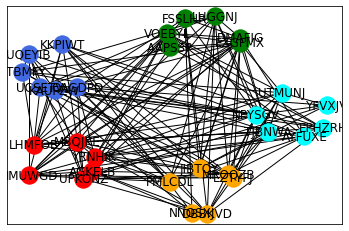

In [239]:
### SPRING LAYOUT GROUPED BY DISEASES - original code
import string, random
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import random as sparse_random


# Random string generator
def rand_string(size=6, chars=string.ascii_uppercase):
    return ''.join(random.choice(chars) for _ in range(size))


# Set up a nodes and networks randomly
nodes = [rand_string() for _ in range(30)]
networks = [rand_string() for _ in range(5)]
networks_list = networks*6
random.shuffle(networks_list)

# Define what nodes belong to what network and what their color should be
node_network_map = dict(zip(nodes, networks_list))
colors = ['green', 'royalblue', 'red', 'orange', 'cyan']
color_map = dict(zip(networks, colors))

graph = nx.Graph()
graph.add_nodes_from(nodes)
nodes_by_color = {val: [node for node in graph if color_map[node_network_map[node]] == val]
                  for val in colors}

# Take random sparse matrix as adjacency matrix
mat = sparse_random(30, 30, density=0.3).todense()
for row, row_val in enumerate(nodes):
    for col, col_val in enumerate(nodes):
        if col > row and mat[row, col] != 0.0: # Stick to upper half triangle, mat is not symmetric
            graph.add_edge(row_val, col_val, weight=mat[row, col])

# Choose a layout to visualize graph
pos = nx.spring_layout(graph)



# --- Begin_myhack ---
# All this code should replace original `pos=nx.spring_layout(graph)`
import numpy as np
#graph = G_nf_rw_literature
pos = nx.circular_layout(graph)   # replaces your original pos=...
# prep center points (along circle perimeter) for the clusters
angs = np.linspace(0, 2*np.pi, 1+len(colors))
repos = []
rad = 3.5     # radius of circle
for ea in angs:
    if ea > 0:
        #print(rad*np.cos(ea), rad*np.sin(ea))  # location of each cluster
        repos.append(np.array([rad*np.cos(ea), rad*np.sin(ea)]))
for ea in pos.keys():
    #color = 'black'
    posx = 0
    if ea in nodes_by_color['green']:
        #color = 'green'
        posx = 0
    elif ea in nodes_by_color['royalblue']:
        #color = 'royalblue'
        posx = 1
    elif ea in nodes_by_color['red']:
        #color = 'red'
        posx = 2
    elif ea in nodes_by_color['orange']:
        #color = 'orange'
        posx = 3
    elif ea in nodes_by_color['cyan']:
        #color = 'cyan'
        posx = 4
    else:
        pass
    #print(ea, pos[ea], pos[ea]+repos[posx], color, posx)
    pos[ea] += repos[posx]
# --- End_myhack ---

edges = graph.edges()
'''
# Get the edge weights and normalize them 
weights = [abs(graph[u][v]['weight']) for u, v in edges]
weights_n = [5*float(i)/max(weights) for i in weights] # Change 5 to control thickness
'''
# First draw the nodes 

plt.figure()
for color, node_names in nodes_by_color.items():
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=node_names, node_color=color)

# Then draw edges with thickness defined by weights_n
nx.draw_networkx_edges(graph, pos=pos)#, width=weights_n)
nx.draw_networkx_labels(graph, pos=pos)
plt.show()